<a href="https://colab.research.google.com/github/yohanesnuwara/LiDAR/blob/main/Borneo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- Ground classification and CHM map
- Building and tree segmentation
- Individual tree detection

In [ ]:
!unset PYTHONPATH

!wget https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh && bash Miniconda3-latest-Linux-x86_64.sh -bfp /usr/local

--2022-12-06 09:00:14--  https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 76607678 (73M) [application/x-sh]
Saving to: ‘Miniconda3-latest-Linux-x86_64.sh’

Miniconda3-latest-L 100%[===================>]  73.06M  71.8MB/s    in 1.0s    

2022-12-06 09:00:15 (71.8 MB/s) - ‘Miniconda3-latest-Linux-x86_64.sh’ saved [76607678/76607678]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: / - done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - _openmp_mutex==4.5=1_gnu
    - brotlipy==0.7.0=py39h27cfd23_1003
    - ca-certificates==2022.3.29=h06a4308_1
    - certifi==2021.10.8=py39h06a4308_2
    - cffi==1.15.0=py39hd667e15_1
    - charset-normalizer==

In [ ]:
import sys
sys.path.append('/usr/local/lib/python3.6/site-packages')

In [ ]:
!conda install -y -q -c conda-forge python-pdal

Solving environment: ...working... done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - python-pdal


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _libgcc_mutex-0.1          |      conda_forge           3 KB  conda-forge
    _openmp_mutex-4.5          |       2_kmp_llvm           6 KB  conda-forge
    blosc-1.21.1               |       h83bc5f7_3          47 KB  conda-forge
    boost-cpp-1.78.0           |       h75c5d50_1        17.1 MB  conda-forge
    bzip2-1.0.8                |       h7f98852_4         484 KB  conda-forge
    c-ares-1.18.1              |       h7f98852_0         113 KB  conda-forge
    ca-certificates-2022.9.24  |       ha878542_0         150 KB  conda-forge
    cairo-1.16.0               |    ha61ee94_1014         1.5 MB  conda-forge
    certifi-2022.9.24          |     pyhd8ed1ab_0         155 KB  conda-forge
    cfitsio-

In [ ]:
!wget --user ynuwara --password Heisenberg97 https://daac.ornl.gov/daacdata/cms/CMS_LiDAR_Indonesia/data/Polygon_014_utm_50S_3.laz


--2022-12-18 15:33:27--  https://daac.ornl.gov/daacdata/cms/CMS_LiDAR_Indonesia/data/Polygon_014_utm_50S_3.laz
Resolving daac.ornl.gov (daac.ornl.gov)... 160.91.19.24
Connecting to daac.ornl.gov (daac.ornl.gov)|160.91.19.24|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://urs.earthdata.nasa.gov/oauth/authorize?app_type=401&client_id=QyeRbBJg8YuY_WBh-KBztA&response_type=code&redirect_uri=https%3A%2F%2Fdaac.ornl.gov%2Fdaacdata%2Fdoesntmater&state=aHR0cHM6Ly9kYWFjLm9ybmwuZ292L2RhYWNkYXRhL2Ntcy9DTVNfTGlEQVJfSW5kb25lc2lhL2RhdGEvUG9seWdvbl8wMTRfdXRtXzUwU18zLmxheg [following]
--2022-12-18 15:33:27--  https://urs.earthdata.nasa.gov/oauth/authorize?app_type=401&client_id=QyeRbBJg8YuY_WBh-KBztA&response_type=code&redirect_uri=https%3A%2F%2Fdaac.ornl.gov%2Fdaacdata%2Fdoesntmater&state=aHR0cHM6Ly9kYWFjLm9ybmwuZ292L2RhYWNkYXRhL2Ntcy9DTVNfTGlEQVJfSW5kb25lc2lhL2RhdGEvUG9seWdvbl8wMTRfdXRtXzUwU18zLmxheg
Resolving urs.earthdata.nasa.gov (urs.earthdata.nasa.gov)... 1

## 1 - Read LAZ data and write to LAS

In [ ]:
!pdal info /content/Polygon_014_utm_50S_3.laz --dimensions X,Y,Z,Classification

{
  "file_size": 21039074,
  "filename": "/content/Polygon_014_utm_50S_3.laz",
  "now": "2022-12-06T09:41:31+0000",
  "pdal_version": "2.4.3 (git-version: a0961c)",
  "reader": "readers.las",
  "stats":
  {
    "bbox":
    {
      "native":
      {
        "bbox":
        {
          "maxx": 219433.94,
          "maxy": 9745664.9,
          "maxz": 660.73,
          "minx": 218620.96,
          "miny": 9744713.06,
          "minz": 4.66
        },
        "boundary": { "type": "Polygon", "coordinates": [ [ [ 218620.96, 9744713.060000000521541, 4.66 ], [ 218620.96, 9745664.900000000372529, 4.66 ], [ 219433.94, 9745664.900000000372529, 660.73 ], [ 219433.94, 9744713.060000000521541, 660.73 ], [ 218620.96, 9744713.060000000521541, 4.66 ] ] ] }
      }
    },
    "statistic":
    [
      {
        "average": 219071.1851,
        "count": 5266966,
        "maximum": 219433.94,
        "minimum": 218620.96,
        "name": "X",
        "position": 0,
        "stddev": 171.401639,
        "va

In [ ]:
%%writefile read_write.py
pipeline="""{
  "pipeline": [
    {
        "type": "readers.las",
        "filename": "/content/Polygon_014_utm_50S_3.laz"
    },   
    {
        "type": "writers.las",
        "filename": "/content/Polygon_014_utm_50S_3.las"
     }
  ]
}"""

import pdal
r = pdal.Pipeline(pipeline)
# r.validate()
r.execute()

arrays = r.arrays
print(arrays)

Writing read_write.py


In [ ]:
!python read_write.py

[array([(219000.  , 9744763.64,  6.85, 30, 2, 2, 0, 0, 0, -17., 0, 110, 98507277.51513389, 0, 0, 0),
       (219000.46, 9744763.37,  6.46, 21, 2, 2, 0, 0, 2, -17., 0, 110, 98507277.51513988, 0, 0, 0),
       (219000.37, 9744763.53,  6.56, 39, 2, 2, 1, 0, 2, -17., 0, 110, 98507277.51743788, 0, 0, 0),
       ...,
       (218999.17, 9745499.87, 15.79,  1, 1, 4, 0, 0, 0,  13., 0, 110, 98507292.96204288, 0, 0, 0),
       (218999.38, 9745499.87, 14.75, 22, 1, 4, 0, 0, 0,  13., 0, 110, 98507292.96204989, 0, 0, 0),
       (218999.96, 9745499.56, 15.68, 36, 1, 1, 0, 0, 0,  13., 0, 110, 98507292.96205688, 0, 0, 0)],
      dtype=[('X', '<f8'), ('Y', '<f8'), ('Z', '<f8'), ('Intensity', '<u2'), ('ReturnNumber', 'u1'), ('NumberOfReturns', 'u1'), ('ScanDirectionFlag', 'u1'), ('EdgeOfFlightLine', 'u1'), ('Classification', 'u1'), ('ScanAngleRank', '<f4'), ('UserData', 'u1'), ('PointSourceId', '<u2'), ('GpsTime', '<f8'), ('Red', '<u2'), ('Green', '<u2'), ('Blue', '<u2')])]


![image](https://user-images.githubusercontent.com/51282928/205551863-ec88a8f7-254c-4687-a74e-96bec4509a46.png)

## 2 - Remove outliers using height filter (rule-based)

In [ ]:
%%writefile remove_outlier.py
pipeline="""{
  "pipeline": [
    {
        "type": "readers.las",
        "filename": "/content/Polygon_014_utm_50S_3.laz"
    },
    {
        "limits": "Z[0:40]", 
        "type": "filters.range" 
    },       
    {
        "type": "writers.las",
        "filename": "/content/Polygon_014_utm_50S_3_outlier_removed.las"
     }
  ]
}"""

import pdal
r = pdal.Pipeline(pipeline)
# r.validate()
r.execute()

arrays = r.arrays
print(arrays)

Writing remove_outlier.py


In [ ]:
!python remove_outlier.py

[array([(219000.  , 9744763.64,  6.85, 30, 2, 2, 0, 0, 0, -17., 0, 110, 98507277.51513389, 0, 0, 0),
       (219000.46, 9744763.37,  6.46, 21, 2, 2, 0, 0, 2, -17., 0, 110, 98507277.51513988, 0, 0, 0),
       (219000.37, 9744763.53,  6.56, 39, 2, 2, 1, 0, 2, -17., 0, 110, 98507277.51743788, 0, 0, 0),
       ...,
       (218999.17, 9745499.87, 15.79,  1, 1, 4, 0, 0, 0,  13., 0, 110, 98507292.96204288, 0, 0, 0),
       (218999.38, 9745499.87, 14.75, 22, 1, 4, 0, 0, 0,  13., 0, 110, 98507292.96204989, 0, 0, 0),
       (218999.96, 9745499.56, 15.68, 36, 1, 1, 0, 0, 0,  13., 0, 110, 98507292.96205688, 0, 0, 0)],
      dtype=[('X', '<f8'), ('Y', '<f8'), ('Z', '<f8'), ('Intensity', '<u2'), ('ReturnNumber', 'u1'), ('NumberOfReturns', 'u1'), ('ScanDirectionFlag', 'u1'), ('EdgeOfFlightLine', 'u1'), ('Classification', 'u1'), ('ScanAngleRank', '<f4'), ('UserData', 'u1'), ('PointSourceId', '<u2'), ('GpsTime', '<f8'), ('Red', '<u2'), ('Green', '<u2'), ('Blue', '<u2')])]


![image](https://user-images.githubusercontent.com/51282928/205552214-971ec5ad-e920-481d-8163-cb9d4f5d5e72.png)

## Groundpoint classification

In [ ]:
%%writefile ground_classify_naive.py
pipeline="""{
    "pipeline":[
        {
            "type": "readers.las",
            "filename": "/content/Polygon_014_utm_50S_3.laz"
        },
        {
              "type": "filters.range",
              "limits": "Classification[2:2]"
        },
         {
             "type": "writers.las",
             "filename": "/content/Polygon_014_utm_50S_3_naive_ground_classified.laz"
         }
    ]
}"""

import pdal
r = pdal.Pipeline(pipeline)
# r.validate()
r.execute()

arrays = r.arrays
print(arrays)

Writing ground_classify_naive.py


In [ ]:
!python ground_classify_naive.py

[array([(219000.46, 9744763.37, 6.46, 21, 2, 2, 0, 0, 2, -17., 0, 110, 98507277.51513988, 0, 0, 0),
       (219000.37, 9744763.53, 6.56, 39, 2, 2, 1, 0, 2, -17., 0, 110, 98507277.51743788, 0, 0, 0),
       (219001.98, 9744767.64, 6.63, 50, 1, 1, 1, 0, 2, -16., 0, 110, 98507277.62093489, 0, 0, 0),
       ...,
       (218995.57, 9745499.52, 7.03, 24, 3, 3, 0, 0, 2,  13., 0, 110, 98507292.91029488, 0, 0, 0),
       (218997.24, 9745498.84, 7.12,  3, 2, 2, 0, 0, 2,  13., 0, 110, 98507292.91032088, 0, 0, 0),
       (218997.64, 9745498.68, 7.08,  1, 3, 3, 0, 0, 2,  13., 0, 110, 98507292.91032788, 0, 0, 0)],
      dtype=[('X', '<f8'), ('Y', '<f8'), ('Z', '<f8'), ('Intensity', '<u2'), ('ReturnNumber', 'u1'), ('NumberOfReturns', 'u1'), ('ScanDirectionFlag', 'u1'), ('EdgeOfFlightLine', 'u1'), ('Classification', 'u1'), ('ScanAngleRank', '<f4'), ('UserData', 'u1'), ('PointSourceId', '<u2'), ('GpsTime', '<f8'), ('Red', '<u2'), ('Green', '<u2'), ('Blue', '<u2')])]


![image](https://user-images.githubusercontent.com/51282928/205873105-9183240a-0edd-4db9-a81a-11341ab120eb.png)

## 3 - Generate DSM data

In [ ]:
%%writefile create_DSM.py
pipeline="""{
    "pipeline":[
        {
            "type": "readers.las",
            "filename": "/content/Polygon_014_utm_50S_3_outlier_removed.las" 
        },
        {
            "type":"filters.range",
            "limits":"returnnumber[1:1]"
        },
        {
            "type": "writers.gdal",
            "filename":"/content/Polygon_014_utm_50S_3_DSM.tif",
            "output_type":"idw",
            "gdaldriver":"GTiff",
            "resolution": 0.1,
            "radius": 1

        }
    ]
}"""

import pdal
r = pdal.Pipeline(pipeline)
# r.validate()
r.execute()

arrays = r.arrays
print(arrays)

Overwriting create_DSM.py


In [ ]:
!python create_DSM.py

[array([(219000.23, 9744764.32,  7.06, 42, 1, 1, 0, 0, 0, -17., 0, 110, 98507277.53237589, 0, 0, 0),
       (219000.57, 9744764.11,  7.08, 50, 1, 1, 0, 0, 0, -17., 0, 110, 98507277.53238288, 0, 0, 0),
       (219000.97, 9744763.87,  6.89, 45, 1, 1, 0, 0, 0, -17., 0, 110, 98507277.53238988, 0, 0, 0),
       ...,
       (218999.17, 9745499.87, 15.79,  1, 1, 4, 0, 0, 0,  13., 0, 110, 98507292.96204288, 0, 0, 0),
       (218999.38, 9745499.87, 14.75, 22, 1, 4, 0, 0, 0,  13., 0, 110, 98507292.96204989, 0, 0, 0),
       (218999.96, 9745499.56, 15.68, 36, 1, 1, 0, 0, 0,  13., 0, 110, 98507292.96205688, 0, 0, 0)],
      dtype=[('X', '<f8'), ('Y', '<f8'), ('Z', '<f8'), ('Intensity', '<u2'), ('ReturnNumber', 'u1'), ('NumberOfReturns', 'u1'), ('ScanDirectionFlag', 'u1'), ('EdgeOfFlightLine', 'u1'), ('Classification', 'u1'), ('ScanAngleRank', '<f4'), ('UserData', 'u1'), ('PointSourceId', '<u2'), ('GpsTime', '<f8'), ('Red', '<u2'), ('Green', '<u2'), ('Blue', '<u2')])]


## 3 - Generate DTM data

In [ ]:
%%writefile create_DTM.py
pipeline="""{
    "pipeline":[
        {
            "type": "readers.las",
            "filename": "/content/Polygon_014_utm_50S_3_outlier_removed.las" 
        },
        {
          "type":"filters.assign",
          "assignment":"Classification[:]=0"
        },
        {
          "type":"filters.elm"
        },
        {
          "type":"filters.outlier"
        },
        {
          "type":"filters.smrf",
          "ignore":"Classification[7:7]",
          "slope":0.2,
          "window":16,
          "threshold":0.45,
          "scalar":1.2
        },
        {
            "type": "writers.gdal",
            "filename":"/content/Polygon_014_utm_50S_3_DTM.tif",
            "output_type":"idw",
            "gdaldriver":"GTiff",
            "resolution": 0.1,
            "radius": 1

        }
    ]
}"""

import pdal
r = pdal.Pipeline(pipeline)
# r.validate()
r.execute()

arrays = r.arrays
print(arrays)

Overwriting create_DTM.py


In [ ]:
!python create_DTM.py

[array([(219000.  , 9744763.64,  6.85, 30, 2, 2, 0, 0, 2, -17., 0, 110, 98507277.51513389, 0, 0, 0),
       (219000.46, 9744763.37,  6.46, 21, 2, 2, 0, 0, 2, -17., 0, 110, 98507277.51513988, 0, 0, 0),
       (219000.37, 9744763.53,  6.56, 39, 2, 2, 1, 0, 2, -17., 0, 110, 98507277.51743788, 0, 0, 0),
       ...,
       (218999.17, 9745499.87, 15.79,  1, 1, 4, 0, 0, 0,  13., 0, 110, 98507292.96204288, 0, 0, 0),
       (218999.38, 9745499.87, 14.75, 22, 1, 4, 0, 0, 0,  13., 0, 110, 98507292.96204989, 0, 0, 0),
       (218999.96, 9745499.56, 15.68, 36, 1, 1, 0, 0, 1,  13., 0, 110, 98507292.96205688, 0, 0, 0)],
      dtype=[('X', '<f8'), ('Y', '<f8'), ('Z', '<f8'), ('Intensity', '<u2'), ('ReturnNumber', 'u1'), ('NumberOfReturns', 'u1'), ('ScanDirectionFlag', 'u1'), ('EdgeOfFlightLine', 'u1'), ('Classification', 'u1'), ('ScanAngleRank', '<f4'), ('UserData', 'u1'), ('PointSourceId', '<u2'), ('GpsTime', '<f8'), ('Red', '<u2'), ('Green', '<u2'), ('Blue', '<u2')])]


## 4 - Generate canopy height model (CHM)

In [ ]:
!pip -q install rioxarray

     |████████████████████████████████| 53 kB 2.0 MB/s 
     |████████████████████████████████| 40 kB 6.6 MB/s 
     |████████████████████████████████| 7.7 MB 30.3 MB/s 
     |████████████████████████████████| 969 kB 62.0 MB/s 
     |████████████████████████████████| 12.2 MB 73.0 MB/s 
     |████████████████████████████████| 498 kB 77.0 MB/s 
     |████████████████████████████████| 247 kB 80.7 MB/s 


In [ ]:
!conda install -c conda-forge rasterio

In [ ]:
%%writefile create_CHM.py
import rasterio as rio
import rioxarray as rxr

dtm_array = rxr.open_rasterio('/content/Polygon_014_utm_50S_3_DTM.tif', masked=True).squeeze()
dsm_array = rxr.open_rasterio('/content/Polygon_014_utm_50S_3_DSM.tif', masked=True).squeeze()

chm_array = dsm_array - dtm_array

chm_array.rio.to_raster('/content/Polygon_014_utm_50S_3_CHM.tif')

Overwriting create_CHM.py


In [ ]:
!python create_CHM.py

In [ ]:
import matplotlib.pyplot as plt
import gdal

In [ ]:
chm = gdal.Open('/content/Polygon_014_utm_50S_3_CHM.tif')

chm_array = chm.ReadAsArray()

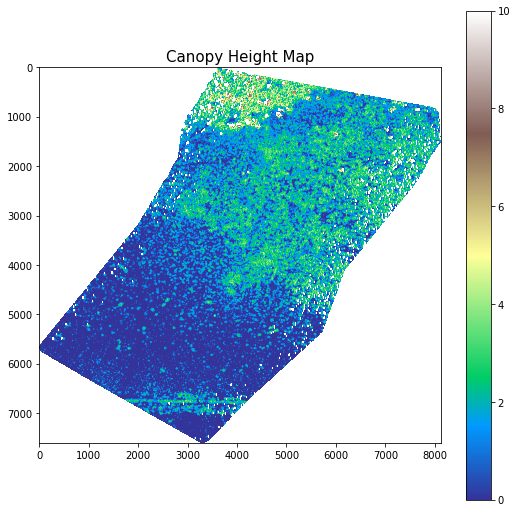

In [ ]:
plt.figure(figsize=(9,9))
plt.title('Canopy Height Map', fontsize=15)
plt.imshow(chm_array, cmap='terrain', aspect='equal', vmin=0, vmax=10)
plt.colorbar()